In [31]:
%load_ext autoreload
%autoreload 2

import ncxt_sxtcnn
from ncxt_sxtcnn.pipe import NCXTPipe
from pathlib import Path
import ncxtutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
base = Path('z:/Axel/2022/Bieke/Symbiont/masked_hx/')
hx_files = [path for path in Path(base).rglob("*.hx") ]

In [5]:
organelles = ["membrane", "nucleus", "symbiont", 'chloroplast','mitochondria']
wd = 'C:/Users/Axel Ekman/Documents/2022/cnn/'

model_args = {"instancenorm": True, "depth": 4}
loader_args = {"sanitize": True}
processor_args = {"block_shape": [48, 48, 48], "binning": 2, "n_blocks": 4}
settings = {"maximum_iterations": 100}

In [6]:
pipe = NCXTPipe(
    folder=base,
    working_directory=wd,
    labels=organelles,
    fold=0,
    processor_args=processor_args,
    model_args=model_args,
    loader_args =loader_args,
    settings=settings,
)
pipe.dataframe()

Files 15 + 0


,project,sample,hxpath,void,symbiont,nucleus,chloroplast,mitochondria,lipid,membrane,membrane1,vacuole
0,masked_hx,Zehr_symbiont_fixed_cells_11_5_filtered_pre_re...,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,1,2.0,3.0,4.0,5.0,6,,
1,masked_hx,Zehr_symbiont_fixed_cells_11_9_filtered_pre_re...,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,1,2.0,3.0,4.0,,5,,
2,masked_hx,Zehr_symbiont_fixed_cells_13_7_filtered_pre_re...,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,1,2.0,3.0,4.0,,5,,
3,masked_hx,Zehr_symbiont_fixed_cells_14_13_filtered_pre_r...,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,1,2.0,4.0,3.0,,5,,
4,masked_hx,Zehr_symbiont_fixed_cells_7_4_filtered_pre_rec_v9,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,2,1.0,4.0,3.0,,5,,
5,masked_hx,Zehr_symbiont_fixed_cells_9_4_filtered_pre_rec_v5,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_sym...,0,1,2.0,3.0,4.0,,5,,
6,masked_hx,Zehr_UCNYA_FR21_2am_2259_27_filtered_pre_rec_v2,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_UCN...,0,3,2.0,4.0,5.0,,1,,
7,masked_hx,Zehr_UCNYA_FR21_4am_2267_30_filtered_pre_rec_v3,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_UCN...,0,3,2.0,4.0,5.0,,1,,
8,masked_hx,Zehr_UCNYA_FR21_4am_2267_36_filtered_pre_rec_v3,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_UCN...,0,3,2.0,4.0,5.0,,1,,
10,masked_hx,Zehr_UCYNA_FR21_3am_15_4_filtered_pre_rec_v2_a...,z:\Axel\2022\Bieke\Symbiont\masked_hx\Zehr_UCY...,0,3,2.0,4.0,5.0,6.0,1,,


Loading state 100 with last weights


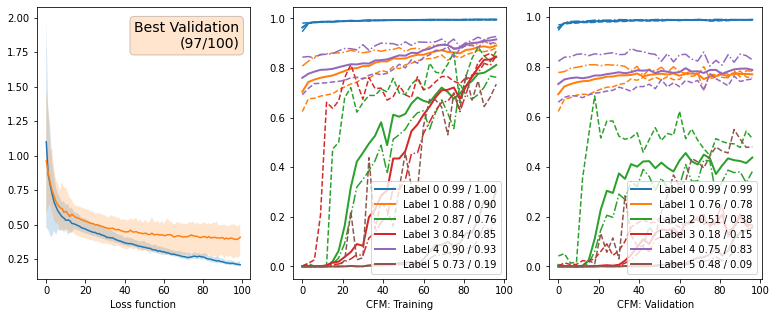

In [9]:
pipe.plot_train()

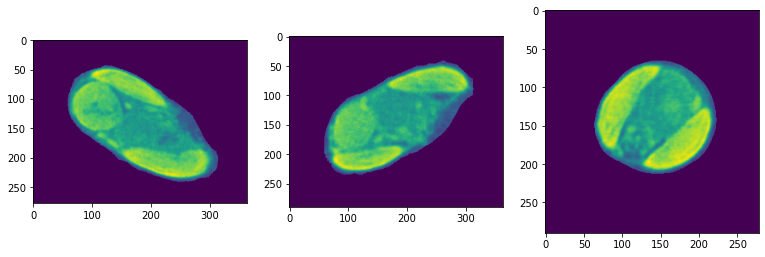

In [37]:
loader = pipe.loader
ncxtutils.volshow(loader[0]['input'][0])

In [79]:
from tqdm.auto import trange